<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Importation du fichier population.csv
population = pd.read_csv("population.csv")

# Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")

# Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")

# Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv("sous_nutrition.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
# Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
# Consulter le nombre de colonnes
print("Nombre de colonnes : ", len(population.columns))

# La nature des données dans chacune des colonnes
print("\nNature des données dans chacune des colonnes : ")
print(population.dtypes)

# Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chacune des colonnes : ")
print(population.count())

Nombre de colonnes :  3

Nature des données dans chacune des colonnes : 
Zone       object
Année       int64
Valeur    float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes : 
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
# Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
# Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
# Multiplication de la colonne valeur par 1000
population["Valeur"] = population["Valeur"] * 1000

In [7]:
# changement du nom de la colonne Valeur par Population
population = population.rename(columns={"Valeur": "Population"})

In [8]:
# Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
# Afficher les dimensions du dataset
print(
    "Le tableau comporte {} observation(s) ou article(s)".format(
        dispo_alimentaire.shape[0]
    )
)
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
# Consulter le nombre de colonnes
print("Nombre de colonnes : ", len(dispo_alimentaire.columns))

Nombre de colonnes :  18


In [11]:
# Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [13]:
# multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire["Aliments pour animaux"] *= 1000
dispo_alimentaire["Autres Utilisations"] *= 1000
dispo_alimentaire["Disponibilité intérieure"] *= 1000
dispo_alimentaire["Exportations - Quantité"] *= 1000
dispo_alimentaire["Importations - Quantité"] *= 1000
dispo_alimentaire["Nourriture"] *= 1000
dispo_alimentaire["Pertes"] *= 1000
dispo_alimentaire["Production"] *= 1000
dispo_alimentaire["Semences"] *= 1000
dispo_alimentaire["Traitement"] *= 1000
dispo_alimentaire["Variation de stock"] *= 1000

In [14]:
# Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
# Afficher les dimensions du dataset
print(
    "Le tableau comporte {} observation(s) ou article(s)".format(
        aide_alimentaire.shape[0]
    )
)
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
# Consulter le nombre de colonnes
print("Nombre de colonnes : ", len(aide_alimentaire.columns))

Nombre de colonnes :  4


In [17]:
# Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
# changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(
    columns={"Pays bénéficiaire": "Zone", "Valeur": "Aide_alimentaire"}
)

In [19]:
# Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Aide_alimentaire"] *= 1000

In [20]:
# Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
# Afficher les dimensions du dataset
print(
    "Le tableau comporte {} observation(s) ou article(s)".format(
        sous_nutrition.shape[0]
    )
)

print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
# Consulter le nombre de colonnes
print("Nombre de colonnes : ", len(sous_nutrition.columns))

Nombre de colonnes :  3


In [23]:
# Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
# Conversion de la colonne sous nutrition en numérique
sous_nutrition["Valeur"].replace(["<0.1"], 0, inplace=True)
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"])

In [25]:
# Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"], errors="coerce")

# Puis remplacement des NaN en 0
sous_nutrition["Valeur"] = sous_nutrition["Valeur"].fillna(0)

In [26]:
# changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={"Valeur": "sous_nutrition"})

In [27]:
# Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] *= 1000000

In [28]:
# Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Reformater les dates
sous_nutrition["Année"] = sous_nutrition["Année"].replace(
    ["2012-2014", "2013-2015", "2014-2016", "2015-2017", "2016-2018", "2017-2019"],
    ["2013", "2014", "2015", "2016", "2017", "2018"],
)

In [30]:
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [31]:
# conversion du type de la colonne année en int
sous_nutrition["Année"] = sous_nutrition["Année"].astype(int)
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition["Année"] == 2017]

In [32]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
df = population.merge(sous_nutrition_2017, on=["Zone", "Année"], how="inner")

In [33]:
# Affichage du dataset
df.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [34]:
# Calcul de la population mondiale

pop_mondiale = df["Population"].sum()
print(
    "La population mondiale compte {:,.0f} habitants.".format(pop_mondiale).replace(
        ",", " "
    )
)

La population mondiale compte 7 543 798 779 habitants.


In [35]:
# Calcul du nombre total de personnes en sous-nutrition

personnes_sous_nutrition = df["sous_nutrition"].sum()
print(
    "Le nombre total de personnes en sous-nutrition est {:,.0f} habitants.".format(
        personnes_sous_nutrition
    ).replace(",", " ")
)

Le nombre total de personnes en sous-nutrition est 535 700 000 habitants.


In [36]:
# Proportion du nombre de personnes en sous nutrition
proportion = (personnes_sous_nutrition / pop_mondiale) * 100
print(
    "En 2017 : {:,.2f} % de la population mondiale est en état de sous-nutrition.".format(
        proportion
    ).replace(
        ",", " "
    )
)

En 2017 : 7.10 % de la population mondiale est en état de sous-nutrition.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [37]:
# Combien mange en moyenne un être humain ? Source =>

In [38]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [39]:
population = population.loc[population["Année"] == 2017]
population.head()

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


In [40]:
# On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df_pop_dispo = dispo_alimentaire.merge(population, on="Zone", how="left")

In [41]:
df_pop_dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0


In [42]:
# Calcul de la disponibilité alimentaire (Kcal) totale

totalDispoKal = (
    (
        (df_pop_dispo["Population"])
        * (df_pop_dispo["Disponibilité alimentaire (Kcal/personne/jour)"])
    ).sum()
) * 365
print(
    "La quantité de disponibilité alimentaire est de : {:,.2f} Kcal".format(
        totalDispoKal
    ).replace(",", " ")
)

La quantité de disponibilité alimentaire est de : 7 635 429 388 975 815.00 Kcal


In [43]:
# Calcul du nombre d'humains pouvant être nourris

totalNourri = totalDispoKal / (2250 * 365)

print(
    "Le nombre théorique de personnes qui pourraient être nourries en 2017 est: {:,.0f} personnes.".format(
        totalNourri
    ).replace(
        ",", " "
    )
)

Le nombre théorique de personnes qui pourraient être nourries en 2017 est: 9 297 326 501 personnes.


In [44]:
## rajoiut porportion

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [45]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [46]:
population.head()

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


In [47]:
# Transfert des données avec les végétaux dans un nouveau dataframe

# Garder seulement les colonnes dont nous avons besoin
dispoAlimentaireA = dispo_alimentaire[
    [
        "Zone",
        "Produit",
        "Origine",
        "Disponibilité alimentaire (Kcal/personne/jour)",
        "Disponibilité alimentaire en quantité (kg/personne/an)",
        "Disponibilité de protéines en quantité (g/personne/jour)",
    ]
]

# Filtrer sur les données pour les aliments d'origine végétal.
dispoAlimentaireA = dispoAlimentaireA.loc[dispo_alimentaire["Origine"] == "vegetale", :]

In [48]:
# Regroupement des données par 'Zone'
dispoAlimentaireA = dispoAlimentaireA.groupby("Zone").sum()

dispoAlimentaireA.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,
Afghanistan,1871.0,271.49,46.05
Afrique du Sud,2533.0,425.17,48.94
Albanie,2203.0,706.49,51.96
Algérie,2915.0,632.35,66.94
Allemagne,2461.0,568.82,39.90


In [49]:
# Jointure sur la colonne Zone
dispoAlimentaireA = pd.merge(dispoAlimentaireA, population, on="Zone")
dispoAlimentaireA.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Année,Population
0,Afghanistan,1871.0,271.49,46.05,2017,36296113.0
1,Afrique du Sud,2533.0,425.17,48.94,2017,57009756.0
2,Albanie,2203.0,706.49,51.96,2017,2884169.0
3,Algérie,2915.0,632.35,66.94,2017,41389189.0
4,Allemagne,2461.0,568.82,39.90,2017,82658409.0


In [50]:
# Calcul du nombre de kcal disponible pour les végétaux
kcal_dispo_vegetaux = (
    dispoAlimentaireA["Population"]
    * dispoAlimentaireA["Disponibilité alimentaire (Kcal/personne/jour)"]
).sum()
kcal_dispo_vegetaux

17260764211501.0

In [51]:
# Calcul du nombre d'humains pouvant être nourris avec les végétaux
totalDispoVegKcal = (kcal_dispo_vegetaux / 2250).round()
print(
    "Le nombre de personnes pouvant être nourries avec la disponibilité alimentaire végétale totale est de : \n{:,} personnes".format(
        totalDispoVegKcal
    ).replace(
        ",", " "
    )
)

Le nombre de personnes pouvant être nourries avec la disponibilité alimentaire végétale totale est de : 
7 671 450 761.0 personnes


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [52]:
dispoAlimentaireB = dispo_alimentaire[
    [
        "Zone",
        "Aliments pour animaux",
        "Autres Utilisations",
        "Disponibilité intérieure",
        "Exportations - Quantité",
        "Importations - Quantité",
        "Nourriture",
        "Pertes",
        "Production",
        "Semences",
        "Traitement",
        "Variation de stock",
    ]
]

In [53]:
# Garder seulement les colonnes qui me seront utiles
dispoAlimentaireB = dispo_alimentaire[
    [
        "Zone",
        "Aliments pour animaux",
        "Autres Utilisations",
        "Disponibilité intérieure",
        "Exportations - Quantité",
        "Importations - Quantité",
        "Nourriture",
        "Pertes",
        "Production",
        "Semences",
        "Traitement",
        "Variation de stock",
    ]
]

# Regroupement de mes données par rapport à la colonne Zone et somme de la dispo_alimentaire
dispoAlimentaireB = dispoAlimentaireB.groupby("Zone").sum().reset_index(drop=True)
dispoAlimentaireB.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,768000.0,415000.0,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0
1,5309000.0,876000.0,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0
2,660000.0,174000.0,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0
3,4352000.0,1707000.0,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0
4,30209000.0,7711000.0,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0


In [54]:
# Calcul des proportions
proportions = [
    ("alimentation animale", "Aliments pour animaux"),
    ("pertes", "Pertes"),
    ("nourriture", "Nourriture"),
]

# Calcul et affichage des proportions
for proportion_name, column_name in proportions:
    proportion = (
        dispoAlimentaireB[column_name].sum()
        / dispoAlimentaireB["Disponibilité intérieure"].sum()
        * 100
    )
    print(
        "La proportion pour {} est de : {:,.2f} %".format(
            proportion_name, proportion
        ).replace(",", " ")
    )

La proportion pour alimentation animale est de : 13.24 %
La proportion pour pertes est de : 4.61 %
La proportion pour nourriture est de : 49.51 %


In [55]:
# calcul pour semences, traitements et autres utilisations
# Calcul des proportions
proportions = [
    ("alimentation animale", "Aliments pour animaux"),
    ("pertes", "Pertes"),
    ("nourriture", "Nourriture"),
    ("autres utilisations", "Autres Utilisations"),
    ("semences", "Semences"),
    ("traitement", "Traitement"),
]

# Calcul et affichage des proportions
for proportion_name, column_name in proportions:
    proportion = (
        dispoAlimentaireB[column_name].sum()
        / dispoAlimentaireB["Disponibilité intérieure"].sum()
        * 100
    )
    print(
        "La proportion pour {} est de : {:,.2f} %".format(
            proportion_name, proportion
        ).replace(",", " ")
    )

La proportion pour alimentation animale est de : 13.24 %
La proportion pour pertes est de : 4.61 %
La proportion pour nourriture est de : 49.51 %
La proportion pour autres utilisations est de : 8.78 %
La proportion pour semences est de : 1.57 %
La proportion pour traitement est de : 22.38 %


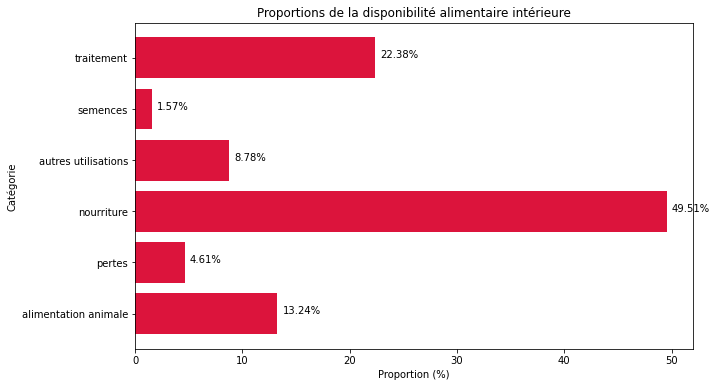

In [56]:
# Affichage des proportions
proportions_values = []
proportions_labels = []
for proportion_name, column_name in proportions:
    proportion = (
        dispoAlimentaireB[column_name].sum()
        / dispoAlimentaireB["Disponibilité intérieure"].sum()
        * 100
    )
    proportions_values.append(proportion)
    proportions_labels.append(proportion_name)
    
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

plt.barh(proportions_labels, proportions_values, color='crimson')

plt.xlabel('Proportion (%)')
plt.xticks(fontsize=10)

plt.ylabel('Catégorie')
plt.yticks(fontsize=10)

plt.title('Proportions de la disponibilité alimentaire intérieure')

for i, v in enumerate(proportions_values):
    plt.text(v + 0.5, i, f'{v:.2f}%', color='black', fontsize=10)

plt.show()

In [57]:
# Calcul de la disponibilité totale
dispo_totale = dispoAlimentaireB["Disponibilité intérieure"].sum()
dispo_totale

9848994000.0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [58]:
# Création d'une liste avec toutes les variables
liste_cereales = [
    "Blé",
    "Riz (Eq Blanchi)",
    "Orge",
    "Maïs",
    "Millet",
    "Céréales, Autres",
    "Seigle",
    "Avoine",
    "Sorgho",
]
print(liste_cereales)

['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Millet', 'Céréales, Autres', 'Seigle', 'Avoine', 'Sorgho']


In [59]:
# Création d'un dataframe avec les informations uniquement pour ces céréales
df_cereales = dispo_alimentaire[dispo_alimentaire["Produit"].isin(liste_cereales)]
df_cereales["Produit"].unique()

array(['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge',
       'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho'], dtype=object)

In [60]:
df_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,0.79,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0


In [61]:
# Affichage de la proportion d'alimentation humaine

prop_cereales_alimentation_humaine = (
    df_cereales["Nourriture"].sum()
    * 100
    / df_cereales["Disponibilité intérieure"].sum()
)
# prop_cereales_alimentation_humaine
print(f"La proportion des céréales dans l'alimentation humaine est de {prop_cereales_alimentation_humaine:.2f}%")

La proportion des céréales dans l'alimentation humaine est de 42.75%


In [62]:
# Affichage de la proportion d'alimentation animale

prop_cereales_alimentation_animale = (
    df_cereales["Aliments pour animaux"].sum()
    * 100
    / df_cereales["Disponibilité intérieure"].sum()
)
prop_cereales_alimentation_animale
print(
    f"La proportion des céréales dans lalimentation animale est de {prop_cereales_alimentation_animale:.2f}%"
)

La proportion des céréales dans lalimentation animale est de 36.29%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [63]:
# Création de la colonne proportion par pays
df_sous_nutrition_2017 = df.copy()

df_sous_nutrition_2017["Proportion"] = (
    df_sous_nutrition_2017["sous_nutrition"]
    / df_sous_nutrition_2017["Population"]
    * 100
)
df_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition,Proportion
0,Afghanistan,2017,36296113.0,10500000.0,28.928718
1,Afrique du Sud,2017,57009756.0,3100000.0,5.437666
2,Albanie,2017,2884169.0,100000.0,3.467203
3,Algérie,2017,41389189.0,1300000.0,3.140917
4,Allemagne,2017,82658409.0,0.0,0.000000


In [64]:
# affichage après trie des 10 pires pays

# Tri des 10 pires pays
pires_pays = df_sous_nutrition_2017.sort_values(by="Proportion", ascending=False)

pires_pays = pires_pays.drop("Année", axis=1)

# pays en index
# pires_pays = pires_pays.set_index(pires_pays.columns[0])

pires_pays.head(10)

,Zone,Population,sous_nutrition,Proportion
78,Haïti,10982366.0,5300000.0,48.259182
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.188685
108,Madagascar,25570512.0,10500000.0,41.062924
103,Libéria,4702226.0,1800000.0,38.279742
100,Lesotho,2091534.0,800000.0,38.249438
183,Tchad,15016753.0,5700000.0,37.957606
161,Rwanda,11980961.0,4200000.0,35.055619
121,Mozambique,28649018.0,9400000.0,32.810898
186,Timor-Leste,1243258.0,400000.0,32.173531
0,Afghanistan,36296113.0,10500000.0,28.928718


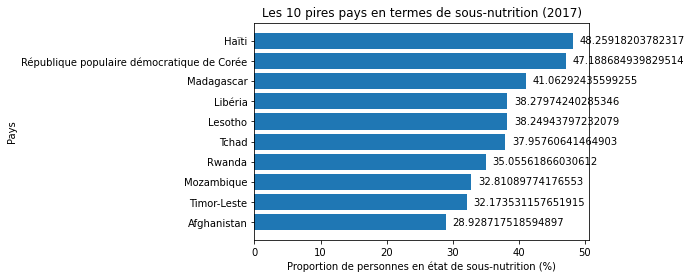

In [65]:
# Création du graphique

pires_10_pays = pires_pays.head(10)
noms_pays = pires_10_pays["Zone"]
proportions = pires_10_pays["Proportion"]

fig, ax = plt.subplots()
ax.barh(noms_pays, proportions)

ax.set_xlabel("Proportion de personnes en état de sous-nutrition (%)")
ax.set_ylabel("Pays")
ax.set_title("Les 10 pires pays en termes de sous-nutrition (2017)")

ax.invert_yaxis()

for i, v in enumerate(proportions):
    ax.text(v + 1, i, str(v), va="center")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [66]:
# Sélection des lignes pour l'année 2013
aide_alimentaire_2013 = aide_alimentaire.loc[aide_alimentaire["Année"] == 2013, :].drop(
    "Année", axis=1
)


# Affichage du DataFrame résultant
aide_alimentaire_2013.head()

,Zone,Produit,Aide_alimentaire
0,Afghanistan,Autres non-céréales,682000
2,Afghanistan,Blé et Farin,39224000
4,Afghanistan,Céréales,40504000
6,Afghanistan,"Fruits secs, total",85000
7,Afghanistan,Huiles végétales,11087000


In [67]:
# Calcul du total de l'aide alimentaire par pays
aide_par_pays = aide_alimentaire_2013.groupby("Zone").sum()

aide_par_pays = aide_par_pays.sort_values(by="Aide_alimentaire", ascending=False)

In [68]:
# affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_par_pays.head(10)

,Aide_alimentaire
Zone,
Éthiopie,591404000
République arabe syrienne,563566000
Soudan,330230000
Yémen,264764000
Kenya,220966000
Soudan du Sud,196330000
République démocratique du Congo,150320000
Somalie,139800000
Bangladesh,131018000


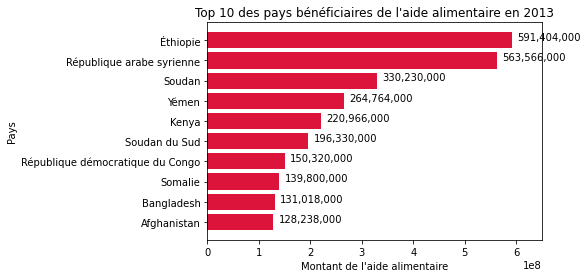

In [69]:
# Création du graphique

top_10_pays_aide_alimentaire = aide_par_pays.head(10)

# Création du graphique
fig, ax = plt.subplots()

# Barres horizontales
ax.barh(top_10_pays_aide_alimentaire.index, top_10_pays_aide_alimentaire["Aide_alimentaire"], color='crimson')

# Définir les labels des axes
ax.set_xlabel("Montant de l'aide alimentaire")
ax.set_ylabel("Pays")

# Ajouter un titre
plt.title("Top 10 des pays bénéficiaires de l'aide alimentaire en 2013")

# Afficher les valeurs sur les barres
for i, v in enumerate(top_10_pays_aide_alimentaire["Aide_alimentaire"]):
    value_text = "{:,.2f}".format(v).rstrip("0").rstrip(".") if v % 1 else "{:,.0f}".format(v)
    ax.text(v + 10000000, i, value_text, color='black')

#     ax.text(v + 10000000, i, "{:,.2f}".format(v), color='black')

# Ajuster les limites de l'axe x
ax.set_xlim([0, top_10_pays_aide_alimentaire["Aide_alimentaire"].max() * 1.1])

# Inverser l'ordre des pays
ax.invert_yaxis()

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [70]:
aide_alimentaire.head()

,Zone,Année,Produit,Aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [71]:
df_aide_alimentaire = aide_alimentaire[["Zone", "Année", "Aide_alimentaire"]]
df_grouped = df_aide_alimentaire.groupby(["Zone", "Année"]).sum().reset_index()

In [72]:
# Filtrer les années 2013 à 2016
df_filtered = df_grouped[(df_grouped["Année"] >= 2013) & (df_grouped["Année"] <= 2016)]

# Regrouper par pays et calculer la somme de l'aide alimentaire
df_sum_by_country = df_filtered.groupby("Zone")["Aide_alimentaire"].sum().reset_index()

# Trier les pays par ordre décroissant de l'aide alimentaire
df_sorted = df_sum_by_country.sort_values("Aide_alimentaire", ascending=False)

In [73]:
# Extraire les cinq premiers pays
top_5_countries = df_sorted["Zone"].head(5).tolist()

df_filtered = df_grouped[df_grouped["Zone"].isin(top_5_countries)]

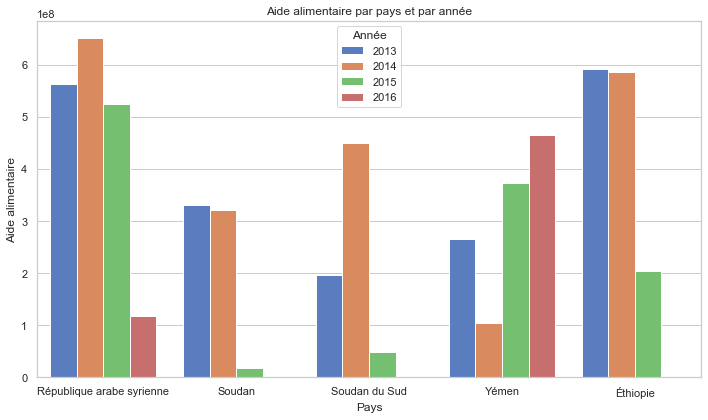

In [74]:
# affichons un graphique

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_filtered,
    x="Zone",
    y="Aide_alimentaire",
    hue="Année",
    palette="muted",
    ci=None,
)

# Ajouter les labels et le titre du graphique
plt.xlabel("Pays")
plt.ylabel("Aide alimentaire")
plt.title("Aide alimentaire par pays et par année")

# Afficher la légende
plt.legend(title="Année")

# Ajuster l'espacement entre les barres pour une meilleure lisibilité
plt.tight_layout()

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [75]:
# Calcul de la disponibilité en kcal par personne par jour par pays
dispo_group_pays = dispo_alimentaire.groupby("Zone")[
    "Disponibilité alimentaire (Kcal/personne/jour)"
].sum()

In [76]:
# Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
dispo_par_pays = pd.DataFrame(
    dispo_group_pays.reset_index(name="Disponibilité alimentaire (Kcal/personne/jour)")
)
top_10_pays_moins_dispo = dispo_par_pays.sort_values(
    by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=True
).head(10)

top_10_pays_moins_dispo

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [77]:
# Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
top_10_pays_plus_dispo = dispo_par_pays.sort_values(
    by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False
).head(10)
top_10_pays_plus_dispo

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [78]:
# création d'un dataframe avec uniquement la Thaïlande
dispoAlimentaireThailande = dispo_alimentaire.loc[
    (dispo_alimentaire["Zone"] == "Thaïlande")
    & (dispo_alimentaire["Produit"] == "Manioc"),
    :,
]
dispoAlimentaireThailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [79]:
population = pd.read_csv("population.csv")
population["Valeur"] = population["Valeur"] * 1000
population = population.rename(columns={"Valeur": "Population"})

In [80]:
df_population_thailande = population.loc[population["Zone"] == "Thaïlande"]

In [81]:
sousNutritionThailande = df_population_thailande.merge(
    sous_nutrition, on=["Zone", "Année"], how="inner"
)

In [82]:
# Calcul de la sous-nutrition en Thaïlande
proportion = (
    sousNutritionThailande["sous_nutrition"].sum()
    / sousNutritionThailande["Population"].sum()
) * 100

print(f"La proportion de sous-nutrition en Thaïlande est de: {proportion:.2f} %")

La proportion de sous-nutrition en Thaïlande est de: 8.91 %


In [83]:
# On calcule la proportion exportée en fonction de la proportion
export_manioc = (
    (dispoAlimentaireThailande["Exportations - Quantité"].sum())
    / (dispoAlimentaireThailande["Production"].sum())
    * 100
)
print(f"La proportion de manioc exporté est de ", round(export_manioc, 2), "%")

La proportion de manioc exporté est de  83.41 %


In [84]:
# On calcule la proportion exportée en fonction de la proportion
import_manioc = (
    (dispoAlimentaireThailande["Importations - Quantité"].sum())
    / (dispoAlimentaireThailande["Production"].sum())
    * 100
)
print(f"La proportion de manioc importé est de ", round(import_manioc, 2), "%")

La proportion de manioc importé est de  4.14 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [85]:
# Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
# "et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être
# le plus en difficulté au niveau alimentaire"